1.创建文件

In [56]:
import pandas as pd

df =pd.DataFrame({'ID':[1,2,3],'Name':['Tim','Victor','Nick']})
df =df.set_index('ID')
df.to_excel('C:/Users/D/Desktop/pandasVSExcel/1/output.xlsx')
print('Done!')

Done!


2.读取文件

In [57]:
import pandas as pd

people = pd.read_excel('C:/Users/d/desktop/pandasVSExcel/2/People.xlsx')
print(people.shape)
print(people.columns)
print(people.head(3))
print('===============================================================')
print(people.tail(3))


(19972, 6)
Index(['ID', 'Type', 'Title', 'FirstName', 'MiddleName', 'LastName'], dtype='object')
   ID      Type Title FirstName MiddleName    LastName
0   1  Employee   NaN       Ken          J     Sánchez
1   2  Employee   NaN     Terri        Lee       Duffy
2   3  Employee   NaN   Roberto        NaN  Tamburello
          ID                 Type Title FirstName MiddleName LastName
19969  20775  Individual Customer   NaN   Crystal          S       He
19970  20776  Individual Customer   NaN   Crystal        NaN    Zheng
19971  20777  Individual Customer   NaN   Crystal        NaN       Hu


In [58]:
import pandas as pd


#第一列脏数据需要 header确定位置
people =pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/2/People_title_dirty.xlsx',header=1)
print(people.columns)


Index(['ID', 'Type', 'Title', 'FirstName', 'MiddleName', 'LastName'], dtype='object')


In [59]:
import pandas as pd

#第一列没有title
people = pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/2/People_No_title.xlsx', header=None)
people.columns =['ID','Type','Title','FirstName','MiddleName','LastName']
people.set_index('ID',inplace=True)
print(people.columns)
people.to_excel('c:/Users/d/Desktop/pandasVSExcel/2/People_add_title.xlsx')
print('Done!')

Index(['Type', 'Title', 'FirstName', 'MiddleName', 'LastName'], dtype='object')
Done!


In [60]:
import pandas as pd


df = pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/2/People_add_title.xlsx', index_col='ID')
df.to_excel('c:/Users/d/Desktop/pandasVSExcel/2/People_add_title2.xlsx')
print('Done!')

Done!


3.行 列 单元格

In [61]:
import pandas as pd

s1 = pd.Series([100,200,300], index=['x','y','z'])
print(s1)

x    100
y    200
z    300
dtype: int64


In [62]:
import pandas as pd

s1 =pd.Series([1,2,3], index=[1,2,3], name='A')
s2 =pd.Series([10,20,30], index=[1,2,3], name='B')
s3 =pd.Series([100,200,300], index=[1,2,3], name='C')

df =pd.DataFrame({s1.name:s1,s2.name:s2,s3.name:s3})
print(df)
df =pd.DataFrame([s1,s2,s3])
print(df)

   A   B    C
1  1  10  100
2  2  20  200
3  3  30  300
     1    2    3
A    1    2    3
B   10   20   30
C  100  200  300


4-5.数据区域的读取，填充，文字序列  日期填充

In [63]:
import pandas as pd
from datetime import date, timedelta 

def add_month(d, md):
    yd = md //12
    m = d.month + md%12
    if m!=12:
        yd += md//12
        m = m%12
    return date(d.year + yd, m, d.day)

books = pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/4and5/Books.xlsx', skiprows=3, usecols="C:F" ,index_col= None, dtype={'ID':str, 'Data':str})

start= date(2018,1,1)
for i in books.index:
    books.at[i, 'ID'] = i + 1 
    books.at[i, 'InStore'] = 'Yes' if i%2 ==0 else 'No' 
#    books['Date'].at[i] = start + timedelta(days=i) 日加  
#    books['Date'].at[i] = date(start.year +i, start.month, start.day) 月加
    books.at[i, 'Date']= add_month(start, i)

books.set_index('ID',inplace=True)
books.to_excel('C:/Users//d/Desktop/pandasVSExcel/4and5/booksouput.xlsx')
print('Done!')

Done!


d:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


6.函数填充 计算列

In [64]:
import pandas as pd

books =pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/6/Books.xlsx', index_col='ID')
#   books['Price'] = books['Discount'] * books['ListPrice']

# for i in range(5, 16):
#     books['Price'].at[i] = books['ListPrice'].at[i] * books['Discount'].at[i]

books['ListPrice'] = books['ListPrice'].apply(lambda x: x + 2)

print(books)

        Name  ListPrice  Discount  Price
ID                                      
1   Book_001         12       0.5    NaN
2   Book_002         22       0.5    NaN
3   Book_003         32       0.5    NaN
4   Book_004         42       0.5    NaN
5   Book_005         52       0.5    NaN
6   Book_006         62       0.5    NaN
7   Book_007         72       0.5    NaN
8   Book_008         82       0.5    NaN
9   Book_009         92       0.5    NaN
10  Book_010        102       0.5    NaN
11  Book_011        112       0.5    NaN
12  Book_012        122       0.5    NaN
13  Book_013        132       0.5    NaN
14  Book_014        142       0.5    NaN
15  Book_015        152       0.5    NaN
16  Book_016        162       0.5    NaN
17  Book_017        172       0.5    NaN
18  Book_018        182       0.5    NaN
19  Book_019        192       0.5    NaN
20  Book_020        202       0.5    NaN


7.排序 多重排序

In [65]:
import pandas as pd

products =pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/7/List.xlsx', index_col='ID')
products.sort_values(by=['Worthy','Price'], inplace=True,ascending=[True,False])
print(products)


           Name  Price Worthy
ID                           
18  Product_018  11.22     No
15  Product_015  10.31     No
3   Product_003   9.62     No
9   Product_009   8.98     No
6   Product_006   7.34     No
12  Product_012   7.29     No
2   Product_002  11.99    Yes
17  Product_017  11.95    Yes
8   Product_008  11.14    Yes
4   Product_004  11.08    Yes
7   Product_007  10.97    Yes
19  Product_019  10.95    Yes
16  Product_016  10.26    Yes
1   Product_001   9.82    Yes
10  Product_010   9.18    Yes
14  Product_014   9.16    Yes
20  Product_020   8.82    Yes
13  Product_013   8.36    Yes
11  Product_011   8.31    Yes
5   Product_005   7.75    Yes


8.数据筛选 过滤

In [66]:
import pandas as pd

students = pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/8/Students.xlsx', index_col='ID')
students = students.loc[students.Age.apply(lambda a: 18 <= a < 30)] \
    .loc[students.Score.apply(lambda s: 85 <= s <= 100)]
print(students)


           Name  Age  Score
ID                         
2   Student_002   26     92
6   Student_006   20     93
9   Student_009   18     85
19  Student_019   19     86
20  Student_020   20     94


9.柱状图

                                Field  Number
3                         Engineering  216932
1             Business and Management  200312
8     Other/Unspecified Subject Areas  185107
7   Mathematics and Computer Sciences  141651
10                    Social Sciences   81304
9          Physical and Life Sciences   75385
4               Fine and Applied Arts   59736
5                  Health Professions   33947
2                           Education   19483
6                          Humanities   17664
0                         Agriculture   12318


<function matplotlib.pyplot.show(close=None, block=None)>

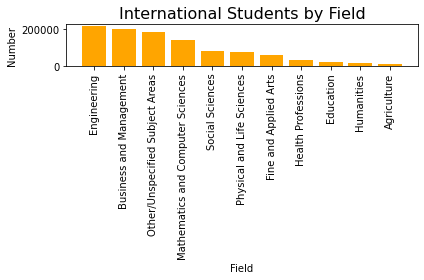

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

students = pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/9/Students.xlsx')
students.sort_values(by='Number',inplace=True,ascending=False)
print(students)
#students.plot.bar(x='Field',y='Number',color='orange',title='International Students by Field')
plt.bar(students.Field,students.Number,color= 'orange')
plt.xticks(students.Field, rotation=90)
plt.xlabel('Field')
plt.ylabel('Number')
plt.title('International Students by Field', fontsize= 16)
plt.tight_layout()
plt.show

10.分组柱图，深度优化

                                Field    2016    2017
4                         Engineering  216932  230711
1             Business and Management  200312  200754
9           Math and Computer Science  141651  167180
12              Other Fields of Study   81318   87577
11                    Social Sciences   81304   83046
10         Physical and Life Sciences   75385   76838
5               Fine and Applied Arts   59736   61506
7                   Intensive English   40877   30309
2       Communications and Journalism   21160   21913
13                         Undeclared   26675   21131
3                           Education   19483   17993
6                          Humanities   17664   17561
8   Legal Studies and Law Enforcement   15077   15306
0                         Agriculture   12318   12602


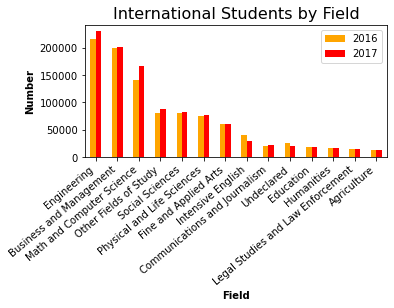

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

students = pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/10/Students.xlsx')
students.sort_values(by='2017', inplace=True, ascending=False)
print(students)
students.plot.bar('Field', ['2016', '2017'], color=['orange', 'Red'])
plt.title('International Students by Field', fontsize=16)
plt.xlabel('Field', fontweight='bold')
plt.ylabel('Number', fontweight='bold')
# plt.tight_layout()
ax = plt.gca()
ax.set_xticklabels(students['Field'], rotation=40, ha='right')
plt.gcf().subplots_adjust(left=0.2, bottom=0.42)
plt.show()

11.叠加柱状图，水平柱状图

    ID      Name  Oct  Nov  Dec  Total
11  12  User_012    7   11   11     29
13  14  User_014    9   11   11     31
0    1  User_001    7   15   10     32
1    2  User_002   10   13   10     33
5    6  User_006   11    9   14     34
9   10  User_010    9   15   10     34
3    4  User_004    8   14   13     35
17  18  User_018    8   13   14     35
4    5  User_005    8   11   16     35
19  20  User_020    9   13   13     35
7    8  User_008    9   12   16     37
8    9  User_009   11   11   15     37
10  11  User_011    9   14   15     38
18  19  User_019    8   16   15     39
2    3  User_003   12   10   17     39
16  17  User_017   10   13   16     39
12  13  User_013    7   15   18     40
6    7  User_007   11   14   17     42
14  15  User_015   10   15   18     43
15  16  User_016   12   14   17     43


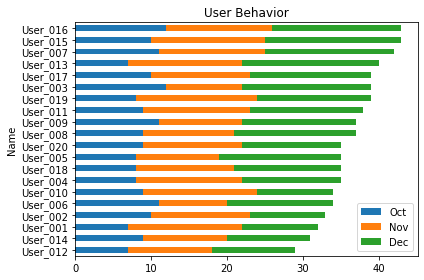

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

users= pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/011/Users.xlsx')
users['Total'] = users['Oct'] + users['Nov'] + users['Dec']
users.sort_values(by='Total', inplace= True,ascending=True)
print(users)

users.plot.barh(x='Name',y=['Oct','Nov','Dec'],stacked=True,title='User Behavior')
plt.tight_layout()
plt.show()


12.饼图

                Rank    2016    2017
From                                
China              1  328547  350755
India              2  165918  186267
South Korea        3   61007   58663
Saudi Arabia       4   61287   52611
Canada             5   26973   27065
Vietnam            6   21403   22438
Taiwan             7   21127   21516
Japan              8   19060   18780
Mexico             9   16733   16835
Brazil            10   19370   13089
Iran              11   12269   12643
Nigeria           12   10674   11710
Nepal             13    9662   11607
United Kingdom    14   11599   11489
Turkey            15   10691   10586
Germany           16   10145   10169
Kuwait            17    9772    9825
France            18    8764    8814
Indonesia         19    8727    8776
Venezuela         20    8267    8540
Malaysia          21    7834    8247
Colombia          22    7815    7982
Hong Kong         23    7923    7547
Spain             24    6640    7164
Bangladesh        25    6513    7143


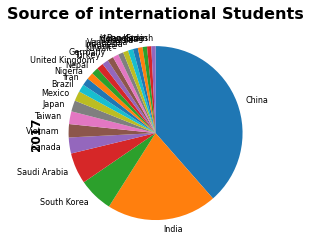

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

students = pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/012/Students.xlsx',index_col='From')
print(students)

students['2017'].plot.pie(fontsize=8,counterclock=False,startangle=-270)
plt.title('Source of international Students',fontsize=16,fontweight='bold')
plt.ylabel('2017',fontsize=12,fontweight='bold')
plt.show()

13.折现趋势图 叠加区域图

       Accessories         Bikes       Clothing    Components   Grand Total
Week                                                                       
1      9939.465500  2.258337e+06    9641.476058  7.872110e+04  2.356639e+06
2     12626.660000  6.005350e+05    7261.730000  0.000000e+00  6.204234e+05
3     14414.950000  5.547708e+05    6775.780000  0.000000e+00  5.759616e+05
4     12924.580000  5.892557e+05    6191.370000  0.000000e+00  6.083717e+05
5     40443.498516  5.749222e+06   99474.598226  4.709014e+05  6.360041e+06
6     13735.460000  5.539423e+05    7660.730000  0.000000e+00  5.753385e+05
7     13588.800000  6.053847e+05    5786.010000  0.000000e+00  6.247596e+05
8     13997.810000  5.320056e+05    6690.370000  0.000000e+00  5.526938e+05
9     52392.263204  4.701389e+06  128208.010272  6.852023e+05  5.567191e+06
10    14276.640000  5.815496e+05    7921.090000  0.000000e+00  6.037474e+05
11    13584.320000  6.169319e+05    6685.880000  0.000000e+00  6.372021e+05
12    14128.

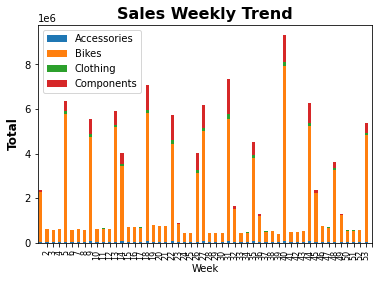

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

weeks =pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/013/Orders.xlsx',index_col='Week')
print(weeks)

#weeks.plot.area(y=['Accessories','Bikes','Clothing','Components'])
weeks.plot.bar(y=['Accessories', 'Bikes', 'Clothing', 'Components'],stacked=True)
plt.title('Sales Weekly Trend',fontsize=16,fontweight='bold')
plt.ylabel('Total',fontsize=12,fontweight='bold')
plt.xticks(weeks.index,fontsize=8)
plt.show()

14.散点图 密度图

           id   price  bedrooms  bathrooms  sqft_living  sqft_basement  \
0  7129300520  221900         3       1.00         1180              0   
1  6414100192  538000         3       2.25         2570            400   
2  5631500400  180000         2       1.00          770              0   
3  2487200875  604000         4       3.00         1960            910   
4  1954400510  510000         3       2.00         1680              0   

   sqft_lot  floors  yr_built  
0      5650     1.0      1955  
1      7242     2.0      1951  
2     10000     1.0      1933  
3      5000     1.0      1965  
4      8080     1.0      1987  


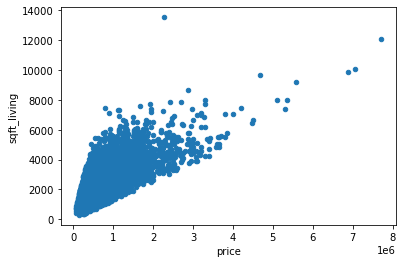

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

homes = pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/014/home_data.xlsx')
print(homes.head())

homes.plot.scatter(y='sqft_living',x='price')
plt.show()

15.密度图 数据相关性

           id   price  bedrooms  bathrooms  sqft_living  sqft_basement  \
0  7129300520  221900         3       1.00         1180              0   
1  6414100192  538000         3       2.25         2570            400   
2  5631500400  180000         2       1.00          770              0   
3  2487200875  604000         4       3.00         1960            910   
4  1954400510  510000         3       2.00         1680              0   

   sqft_lot  floors  yr_built  
0      5650     1.0      1955  
1      7242     2.0      1951  
2     10000     1.0      1933  
3      5000     1.0      1965  
4      8080     1.0      1987  


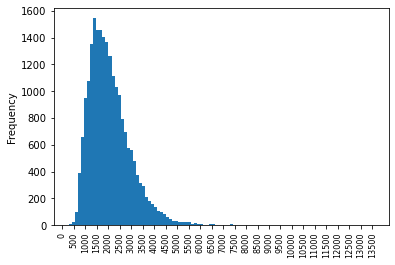

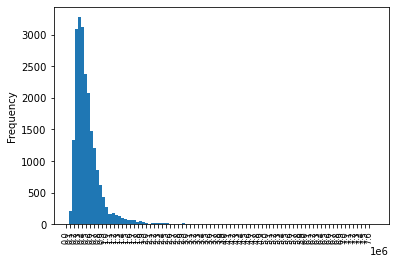

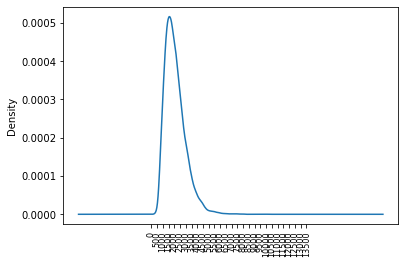

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

homes=pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/014/home_data.xlsx')
print(homes.head())

homes.sqft_living.plot.hist(bins=100)

plt.xticks(range(0,max(homes.sqft_living),500),fontsize=8,rotation=90)
plt.show()
homes.price.plot.hist(bins=100)
plt.xticks(range(0,max(homes.price),100000),fontsize=8,rotation=90)
plt.show()
homes.sqft_living.plot.kde()
plt.xticks(range(0,max(homes.sqft_living),500),fontsize=8,rotation=90)
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

homes=pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/014/home_data.xlsx')
print(homes.corr())

                     id     price  bedrooms  bathrooms  sqft_living  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258   
price         -0.016762  1.000000  0.308350   0.525138     0.702035   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826   
floors         0.018525  0.256794  0.175429   0.500653     0.353949   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049   

               sqft_basement  sqft_lot    floors  yr_built  
id                 -0.005151 -0.132109  0.018525  0.021380  
price               0.323816  0.089661  0.256794  0.054012  
bedrooms            0.303093  0.031703  0.175429  0.154178  
bathrooms           0.283770  0.087740  0.500

16.多表联合

In [16]:
import pandas as pd

students=pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/016/Student_Score.xlsx',sheet_name='Students',index_col='ID')
scores= pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/016/Student_Score.xlsx',sheet_name='Scores',index_col='ID')

# table=students.merge(scores,how='left',left_on=students.index,right_on=scores.index).fillna(0)
table=students.join(scores,how='left').fillna(0)
table.Score=table.Score.astype(int)
print(table)


           Name  Score
ID                    
1   Student_001     81
3   Student_003     83
5   Student_005     85
7   Student_007     87
9   Student_009     89
11  Student_011     91
13  Student_013     93
15  Student_015     95
17  Student_017     97
19  Student_019     99
21  Student_021      0
23  Student_023      0
25  Student_025      0
27  Student_027      0
29  Student_029      0
31  Student_031      0
33  Student_033      0
35  Student_035      0
37  Student_037      0
39  Student_039      0


17.数据校验 轴的概念

In [19]:
import pandas as pd

def scores_validation(row):
    try:
        assert 0<=row.Score<=100
    except:
        print(f'#{row.ID}\tstudents {row.Name} has an invalid score {row.Score}.')

students=pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/017/Students.xlsx')
students.apply(scores_validation,axis=1)

#1	students Student_001 has an invalid score -40.
#2	students Student_002 has an invalid score -30.
#3	students Student_003 has an invalid score -20.
#4	students Student_004 has an invalid score -10.
#16	students Student_016 has an invalid score 110.
#17	students Student_017 has an invalid score 120.
#18	students Student_018 has an invalid score 130.
#19	students Student_019 has an invalid score 140.
#20	students Student_020 has an invalid score 150.


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
dtype: object

In [20]:
import pandas as pd

def scores_validation(row):
    if not 0<= row.Score<= 100:
        print(f'#{row.ID}\tstudent {row.Name} has an invalid score {row.Score}.')

students=pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/017/Students.xlsx')
students.apply(scores_validation,axis=1)

#1	student Student_001 has an invalid score -40.
#2	student Student_002 has an invalid score -30.
#3	student Student_003 has an invalid score -20.
#4	student Student_004 has an invalid score -10.
#16	student Student_016 has an invalid score 110.
#17	student Student_017 has an invalid score 120.
#18	student Student_018 has an invalid score 130.
#19	student Student_019 has an invalid score 140.
#20	student Student_020 has an invalid score 150.


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
dtype: object

18.把一列分割成两列  datatransformation

In [24]:
import pandas as pd

employeses = pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/018/Employees.xlsx',index_col='ID')
df = employeses['Full Name'].str.split(expand=True)
employeses['First Name'] = df[0]
employeses['Last Name'] = df[1]
print(employeses)

           Full Name First Name    Last Name
ID                                          
1         Syed Abbas       Syed        Abbas
2     Catherine Abel  Catherine         Abel
3    Kim Abercrombie        Kim  Abercrombie
4    Kim Abercrombie        Kim  Abercrombie
5    Kim Abercrombie        Kim  Abercrombie
6     Hazem Abolrous      Hazem     Abolrous
7       Sam Abolrous        Sam     Abolrous
8   Humberto Acevedo   Humberto      Acevedo
9     Gustavo Achong    Gustavo       Achong
10    Pilar Ackerman      Pilar     Ackerman
11    Pilar Ackerman      Pilar     Ackerman
12       Aaron Adams      Aaron        Adams
13        Adam Adams       Adam        Adams
14        Alex Adams       Alex        Adams
15   Alexandra Adams  Alexandra        Adams
16     Allison Adams    Allison        Adams
17      Amanda Adams     Amanda        Adams
18       Amber Adams      Amber        Adams
19      Andrea Adams     Andrea        Adams
20       Angel Adams      Angel        Adams


19.求和 求平均 统计导引

In [30]:
import pandas as pd

students= pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/019/Students.xlsx',index_col='ID')
students['Total'] =students[['Test_1','Test_2','Test_3']].sum(axis=1)
students['Average'] =students[['Test_1','Test_2','Test_3']].mean(axis=1)

col_mean = students[['Test_1','Test_2','Test_3','Total','Average']].mean()
col_mean['Name'] = 'Summary'
students = students.append(col_mean, ignore_index=True)

print(students)

           Name  Test_1  Test_2  Test_3  Total    Average
0   Student_001   62.00   86.00    83.0  231.0  77.000000
1   Student_002   77.00   97.00    78.0  252.0  84.000000
2   Student_003   57.00   96.00    46.0  199.0  66.333333
3   Student_004   57.00   87.00    80.0  224.0  74.666667
4   Student_005   95.00   59.00    87.0  241.0  80.333333
5   Student_006   56.00   97.00    61.0  214.0  71.333333
6   Student_007   64.00   91.00    67.0  222.0  74.000000
7   Student_008   96.00   70.00    48.0  214.0  71.333333
8   Student_009   77.00   73.00    48.0  198.0  66.000000
9   Student_010   90.00   94.00    67.0  251.0  83.666667
10  Student_011   62.00   55.00    63.0  180.0  60.000000
11  Student_012   83.00   76.00    81.0  240.0  80.000000
12  Student_013   68.00   60.00    90.0  218.0  72.666667
13  Student_014   82.00   68.00    98.0  248.0  82.666667
14  Student_015   61.00   67.00    91.0  219.0  73.000000
15  Student_016   59.00   63.00    46.0  168.0  56.000000
16  Student_01

C:\Users\D\AppData\Local\Temp\ipykernel_12676\881167969.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  students = students.append(col_mean, ignore_index=True)


20.定位 消除重复数据

In [45]:
import pandas as pd

students = pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/020/Students_Duplicates.xlsx')
# students.drop_duplicates(subset='Name',inplace=True,keep='first')
dupe =students.duplicated(subset='Name')
dupe = dupe[dupe==True]
print(students.iloc[dupe.index])

    ID         Name  Test_1  Test_2  Test_3
20  21  Student_001      62      86      83
21  22  Student_002      77      97      78
22  23  Student_003      57      96      46
23  24  Student_004      57      87      80
24  25  Student_005      95      59      87


21.旋转数据表 行。

In [47]:
import pandas as pd


Videos =pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/021/Videos.xlsx', index_col='Month')
table =Videos.transpose()
print(table)

Month         Jan   Feb   Mar    Apr    May    Jun    Jul    Aug    Sep  \
Active User  1000  1500  2250   3375   5063   7595  11393  17090  25635   
Page View    3500  5250  7875  11813  17721  26583  39876  59815  89723   

Month           Oct     Nov     Dec  
Active User   38453   57680   86520  
Page View    134586  201880  302820  


22.读取CSV TSV TXT 文件中的数据

In [ ]:
import pandas as pd

students1 =pd.read_csv('c:/Users/d/Desktop/pandasVSExcel/022/Students.csv',index_col='ID')
print(students1)

students2 =pd.read_csv('c:/Users/d/Desktop/pandasVSExcel/022/Students.tsv', sep='\t',index_col='ID')
print(students2)

students3 =pd.read_csv('c:/Users/d/Desktop/pandasVSExcel/022/Students.txt',sep='|',index_col='ID')
print(students3)

23.透视表 分组 聚合

In [10]:
import pandas as pd
import numpy as np

orders=pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/023/Orders.xlsx')
orders['Year']=pd.DatetimeIndex(orders['Date']).year

groups =orders.groupby(['Category','Year'])
s = groups['Total'].sum()
c = groups['ID'].count()

pt2 = pd.DataFrame({'Sum': s, 'Count': c})

print(pt2)

                           Sum  Count
Category    Year                     
Accessories 2011  2.082077e+04    360
            2012  1.024398e+05   1339
            2013  6.750247e+05  20684
            2014  4.737876e+05  18811
Bikes       2011  1.194565e+07   3826
            2012  2.898552e+07  10776
            2013  3.626683e+07  16485
            2014  1.745318e+07   8944
Clothing    2011  3.603148e+04    655
            2012  5.555877e+05   4045
            2013  1.067690e+06  10266
            2014  4.612336e+05   6428
Components  2011  6.391730e+05    875
            2012  3.880758e+06   5529
            2013  5.612935e+06   9138
            2014  1.669727e+06   3156


24. 线性回归 数据预测

      Month    Revenue
0   2017.01   5.219502
1   2017.02   4.075924
2   2017.03  13.240190
3   2017.04   6.928844
4   2017.05  15.120419
5   2017.06   9.608529
6   2017.07  22.746334
7   2017.08  27.489305
8   2017.09  17.510031
9   2017.10  17.220169
10  2017.11  15.156002
11  2017.12  39.025900
12  2018.01  18.739449
13  2018.02  29.785448
14  2018.03  20.607362
15  2018.04  35.445472
16  2018.05  61.789251
17  2018.06  57.701989
18  2018.07  66.667342
19  2018.08  38.202189
20  2018.09  57.062463
21  2018.10  56.046796
22  2018.11  43.465649
23  2018.12  59.056942
88.76404338671655


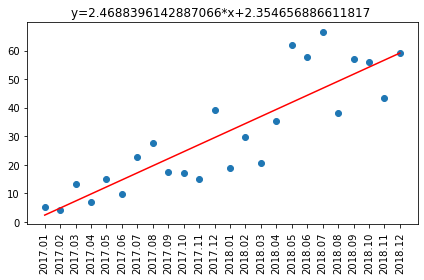

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

sales = pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/024/Sales.xlsx',dtype={'Month': str, 'Revenue': float})
print(sales)

slope, intercept, r_value, p_value, std_err =linregress(sales.index, sales.Revenue)
exp = sales.index * slope + intercept

print(slope*35 +intercept)

plt.scatter(sales.index, sales.Revenue)
plt.plot(sales.index, exp, color='red')
plt.xticks(sales.index, sales.Month, rotation=90)
plt.title(f"y={slope}*x+{intercept} ")
plt.tight_layout()
plt.show()

25.条件格式化

In [7]:
import pandas as pd

def low_score_red(s):
    color = 'red' if s<60 else 'black'
    return f'color:{color}'

def high_score_green(col):
    return ['background-color:lime' if s==col.max() else 'background-color:white' for s in col]

students = pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/025,026/Students.xlsx')
students.style.applymap(low_score_red, subset=['Test_1','Test_2','Test_3']) \
    .apply(high_score_green, subset=['Test_1','Test_2','Test_3'])

,ID,Name,Test_1,Test_2,Test_3
0,1,Student_001,41,31,54
1,2,Student_002,86,22,59
2,3,Student_003,54,25,68
3,4,Student_004,82,36,92
4,5,Student_005,55,99,93
5,6,Student_006,86,12,50
6,7,Student_007,91,11,54
7,8,Student_008,20,98,52
8,9,Student_009,74,85,63
9,10,Student_010,28,98,99


26.条件格式 2

In [9]:
import pandas as pd
import seaborn as sns

color_map = sns.light_palette('green', as_cmap=True)

students=pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/025,026/Students.xlsx', index_col='ID')
students.style.background_gradient(color_map,subset=['Test_1','Test_2','Test_3'])

,Name,Test_1,Test_2,Test_3
ID,,,,
1,Student_001,41,31,54
2,Student_002,86,22,59
3,Student_003,54,25,68
4,Student_004,82,36,92
5,Student_005,55,99,93
6,Student_006,86,12,50
7,Student_007,91,11,54
8,Student_008,20,98,52
9,Student_009,74,85,63


In [10]:
import pandas as pd

students=pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/025,026/Students.xlsx', index_col='ID')
students.style.bar(color='orange',subset=['Test_1','Test_2','Test_3'])

,Name,Test_1,Test_2,Test_3
ID,,,,
1,Student_001,41,31,54
2,Student_002,86,22,59
3,Student_003,54,25,68
4,Student_004,82,36,92
5,Student_005,55,99,93
6,Student_006,86,12,50
7,Student_007,91,11,54
8,Student_008,20,98,52
9,Student_009,74,85,63


⭐⭐⭐27.行操作集锦

In [37]:
import pandas as pd

page_001 = pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/027/Students.xlsx',sheet_name='Page_001')
page_002 = pd.read_excel('C:/Users/d/Desktop/pandasVSExcel/027/Students.xlsx',sheet_name='Page_002')

students = pd.concat([page_001,page_002]).reset_index(drop=True)

stu = pd.Series({'ID':41, 'Name':'Abel','Score':'99'})
students = students.append(stu,ignore_index=True)

stu = pd.Series({'ID':40, 'Name':'Bailey','Score':'120'})
students.iloc[39] =stu

stu = pd.Series({'ID':101, 'Name':'Danni','Score':'101'})
part1 =students[:20]
part2 =students[20:]
students = part1.append(stu,ignore_index=True).append(part2).reset_index(drop=True)

# students.drop(index=range(0,10),inplace=True)
# students.drop(index=students[0:10].index, inplace=True)
for i in range(5,15):
    students['Name'].at[i] = ''

missing = students.loc[students['Name']=='']
students.drop(index=missing.index, inplace=True)

students = students.reset_index(drop=True)

students

C:\Users\D\AppData\Local\Temp\ipykernel_20204\2594334238.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  students = students.append(stu,ignore_index=True)
C:\Users\D\AppData\Local\Temp\ipykernel_20204\2594334238.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  students = part1.append(stu,ignore_index=True).append(part2).reset_index(drop=True)
C:\Users\D\AppData\Local\Temp\ipykernel_20204\2594334238.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  students = part1.append(stu,ignore_index=True).append(part2).reset_index(drop=True)


,ID,Name,Score
0,1,Student_001,90
1,2,Student_002,90
2,3,Student_003,90
3,4,Student_004,90
4,5,Student_005,90
5,16,Student_016,90
6,17,Student_017,90
7,18,Student_018,90
8,19,Student_019,90
9,20,Student_020,90


⭐⭐⭐28.列操作集锦

In [46]:
import pandas as pd
import numpy as np

page_001 =pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/028/Students.xlsx',sheet_name='Page_001')
page_002 =pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/028/Students.xlsx',sheet_name='Page_002')

students = pd.concat([page_001,page_002]).reset_index(drop=True)
students['Age'] = np.repeat(25,len(students))
students.drop(columns=['Age','Score'], inplace=True)
students.insert(1,column='Foo',value=np.repeat('foo',len(students)))
students.rename(columns={'Foo':'FOO','Name':'NAME'}, inplace=True)

students['ID']=students['ID'].astype(float)
for i in range(5,15):
    students['ID'].at[i]= np.nan

students.dropna(inplace=True)

students

,ID,FOO,NAME
0,1.0,foo,Student_001
1,2.0,foo,Student_002
2,3.0,foo,Student_003
3,4.0,foo,Student_004
4,5.0,foo,Student_005
15,16.0,foo,Student_016
16,17.0,foo,Student_017
17,18.0,foo,Student_018
18,19.0,foo,Student_019
19,20.0,foo,Student_020


29.读取数据库

In [47]:
import pyodbc
import sqlalchemy
import pandas as pd

connection = pyodbc.connect('DRIVER={SQL Server}; SERVER=(local); DATABASE=AdventureWorks;USER=sa;PASSWORD=123456')
engine = sqlalchemy.create_engine('mssql+pyodbc://sa:123456@(local)/AdventureWorks?driver=SQL+Server')

query = "SELECT FirstName, LastName FROM Person.Person where FirstName='Timothy'"
df1 = pd.read_sql_query(query, connection)
df2 = pd.read_sql_query(query, engine)

pd.options.display.max_columns = 999
print(df1.head())
print(df2.head())


OperationalError: ('08001', '[08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]SQL Server 不存在或访问被拒绝 (17) (SQLDriverConnect); [08001] [Microsoft][ODBC SQL Server Driver][DBNETLIB]ConnectionOpen (Connect()). (53); [08001] [Microsoft][ODBC SQL Server Driver]无效的连接字符串属性 (0)')

30.复杂方程编写

In [49]:
import pandas as pd
import numpy as np

def get_circumcircle_area(l, h):
    r = np.sqrt(l ** 2 + h ** 2) / 2
    return r ** 2 * np.pi

rects = pd.read_excel('c:/Users/d/Desktop/pandasVSExcel/030/Rectangles.xlsx',index_col='ID')
rects['Circucircle Area'] = rects.apply(lambda row:get_circumcircle_area(row['Length'],row['Height']), axis= 1)

print(rects)

    Length  Height  Circucircle Area
ID                                  
1        8       8        100.530965
2        9       4         76.183622
3        5       7         58.119464
4        6       4         40.840704
5        8       8        100.530965
6        7       5         58.119464
7       11       2         98.174770
8       13       4        145.298660
9        6       9         91.891585
10      11       5        114.668132
11       6       9         91.891585
12      10       8        128.805299
13      10       5         98.174770
14       9       9        127.234502
15      13       3        139.800873
16       8       8        100.530965
17       8       6         78.539816
18       7       7         76.969020
19      12       5        132.732290
20       5       4         32.201325
